<a href="https://colab.research.google.com/github/NaziBaramaki/ImageDenoising/blob/main/Compare_Gausian_Isotropic_Linear_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
#Performs linear diffusion with a Gaussian kernel on the input image.
def linear_diffusion_gaussian(image, t, d=1):
  sigma = np.sqrt(2 * t)
  smoothed_image = cv2.GaussianBlur(image, (0, 0), sigma)
  return smoothed_image

In [19]:
#Performs isotropic linear diffusion on the input image.
def isotropic_linear_diffusion(img, t, d=1):

    height, width = img.shape[:2]
    num_iter = int(t)
    dx, dy = 1.0, 1.0  # Assuming a unit grid
    dt = 0.1 * min(dx**2, dy**2) / d

    for _ in range(num_iter):
        img_new = np.array(img, dtype=float)
        num_steps = int(t / dt)
        u = img_new.copy()  # Initial condition

        for _ in range(num_steps):
        # Compute the Laplacian using finite differences
            u_xx = (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / dx**2
            u_yy = (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, :-2]) / dy**2
            u[1:-1, 1:-1] += d * dt * (u_xx + u_yy)

        # Apply Dirichlet boundary conditions
            u[0, :] = u[-1, :] = u[:, 0] = u[:, -1] = 0

    return u


In [5]:
from google.colab import files
uploaded = files.upload()

Saving office_noisy.png to office_noisy.png


In [6]:
# Load the input image
img = cv2.imread('office_noisy.png', cv2.IMREAD_GRAYSCALE)


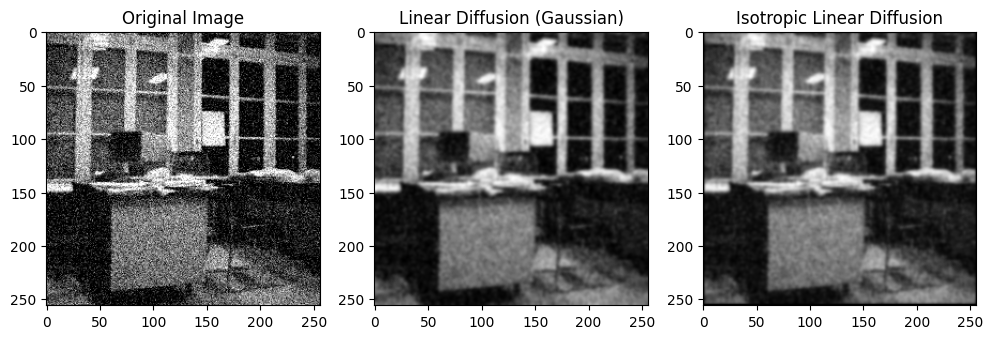

In [20]:
# Set the time variable
t = 1

# Apply linear diffusion with Gaussian kernel
diffused_gaussian = linear_diffusion_gaussian(img, t)

# Apply isotropic linear diffusion
diffused_isotropic = isotropic_linear_diffusion(img, t)

# Display the original and diffused images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(diffused_gaussian, cmap='gray')
axes[1].set_title('Linear Diffusion (Gaussian)')

axes[2].imshow(diffused_isotropic, cmap='gray')
axes[2].set_title('Isotropic Linear Diffusion')

plt.show()